In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


In [11]:
data_dir

'.\\datasets\\flower_photos'

In [12]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [13]:
for path in data_dir.glob('*'):
    print(path)


datasets\flower_photos\flower_photos


In [14]:
list(data_dir.rglob('*.jpg'))


[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos

In [15]:
image_count = len(list(data_dir.rglob('*/*.jpg')))
print(image_count)

3670


In [16]:
roses = list(data_dir.rglob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

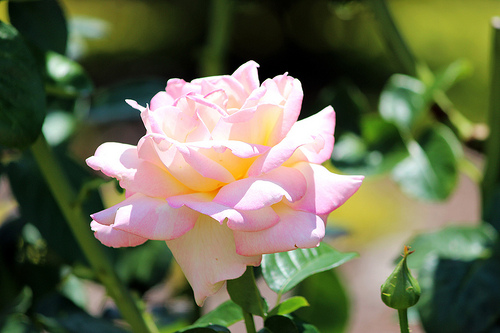

In [17]:
PIL.Image.open(str(roses[65]))

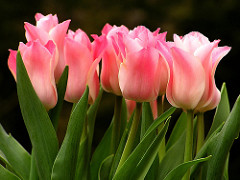

In [18]:
tulips = list(data_dir.rglob('tulips/*'))
PIL.Image.open(str(tulips[15]))

In [19]:
flowers_images_dict = {
    'roses': list(data_dir.rglob('roses/*')),
    'daisy': list(data_dir.rglob('daisy/*')),
    'dandelion': list(data_dir.rglob('dandelion/*')),
    'sunflowers': list(data_dir.rglob('sunflowers/*')),
    'tulips': list(data_dir.rglob('tulips/*')),
}

In [20]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [21]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [22]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [23]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [32]:
img.shape

(240, 179, 3)

In [24]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [25]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [26]:
X = np.array(X)
y = np.array(y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [29]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 394ms/step - accuracy: 0.2757 - loss: 1.8410
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 352ms/step - accuracy: 0.4990 - loss: 1.1719
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 362ms/step - accuracy: 0.6343 - loss: 1.0058
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 390ms/step - accuracy: 0.6950 - loss: 0.8417
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 371ms/step - accuracy: 0.7347 - loss: 0.7115
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 318ms/step - accuracy: 0.8016 - loss: 0.5471
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 357ms/step - accuracy: 0.8794 - loss: 0.3654
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 367ms/step - accuracy: 0.9335 - loss: 0.2048
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 360ms/step - accuracy: 0.9637 - loss: 0.1251
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 370ms/step - accuracy: 0.9695 - loss: 0.0961


In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6056 - loss: 2.1438


[2.1512253284454346, 0.6045751571655273]

In [31]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


array([[  1.2739066 ,   3.858932  ,   4.4349346 , -20.689713  ,
         -8.317842  ],
       [  2.2618518 ,  -4.089378  ,  -9.462368  ,  -4.190557  ,
          2.0859969 ],
       [ -6.8167605 ,  -6.41821   ,   8.637051  , -12.066953  ,
         -1.5568486 ],
       ...,
       [ -2.463619  ,  -8.211127  ,  -8.47631   ,   4.8309655 ,
          3.9209933 ],
       [ -5.2253876 ,   1.1527537 ,   0.04960399,  -8.367602  ,
         -6.6872606 ],
       [ -1.1840276 , -10.376941  ,   0.93395644,   4.3894625 ,
          1.7711844 ]], dtype=float32)

In [32]:
score = tf.nn.softmax(predictions[0])

In [33]:
np.argmax(score)

2

In [34]:
y_test[0]

1

In [37]:
from tensorflow import keras
from keras import layers  # or from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


C:\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


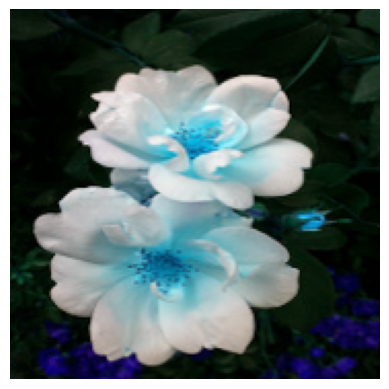

In [38]:
plt.axis('off')
plt.imshow(X[0])

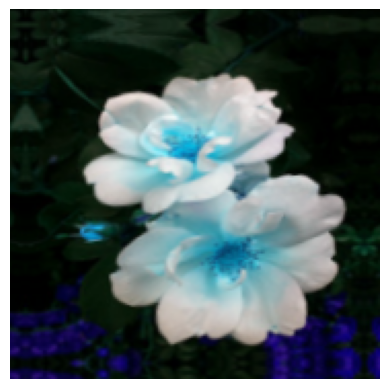

In [39]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [40]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20) 

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 54s 531ms/step - accuracy: 0.2899 - loss: 1.6891
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 45s 523ms/step - accuracy: 0.5503 - loss: 1.1060
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 545ms/step - accuracy: 0.5833 - loss: 1.0453
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 79s 509ms/step - accuracy: 0.6308 - loss: 0.9387
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 76s 435ms/step - accuracy: 0.6515 - loss: 0.8883
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 466ms/step - accuracy: 0.7089 - loss: 0.7857
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 490ms/step - accuracy: 0.6949 - loss: 0.7863
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 78s 436ms/step - accuracy: 0.7270 - loss: 0.7235
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 463ms/step - accuracy: 0.7278 - loss: 0.7115
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 466ms/step - accuracy: 0.7469 - loss: 0.6603
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 426ms/step - accuracy: 0.7509 - loss: 0.6570
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 41

In [41]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7261 - loss: 0.8389


[0.8448508977890015, 0.7352941036224365]